In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/81a6d59be2fea507a3dbf74685b705c15cc3e20f/pima-indians-diabetes-2.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [8]:
dup=df.duplicated()

In [9]:
dup.sum()

0

In [10]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [12]:
X=df.drop(['class'],axis=1)

In [13]:
y=df[['class']]

In [14]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [15]:
reg_model=LogisticRegression()
reg_model.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
reg_model.score(X_train,y_train)

0.7728119180633147

In [17]:
reg_model.score(X_test,y_test)

0.7835497835497836

In [18]:
##?//


In [19]:
predictions=reg_model.predict(X_test)

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [21]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1,0])

In [22]:
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])

In [23]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<AxesSubplot:>

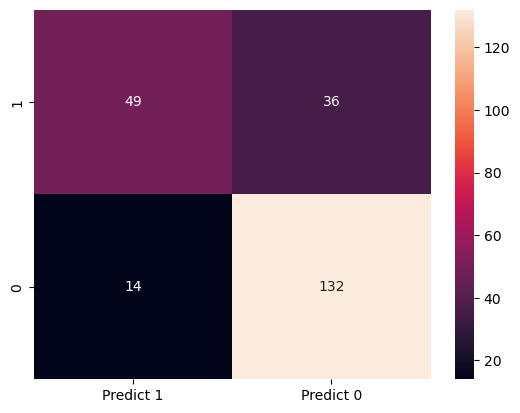

In [24]:
sns.heatmap(df_cm,annot=True,fmt='g')

In [25]:
from sklearn.svm import SVC

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
clf=SVC(kernel='linear')

In [28]:
clf.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [29]:
y_pred=clf.predict(X_test)

In [30]:
clf.score(X_train,y_train)

0.7802607076350093

In [31]:
clf.score(X_test,y_test)

0.7922077922077922

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=5,p=2) #p=1 manhatten p=2 eucildian

In [34]:
knn.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [35]:
knn.score(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8063314711359404

In [36]:
knn.score(X_test,y_test)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7705627705627706

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree=DecisionTreeClassifier(max_depth=4, criterion='entropy')

In [39]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
dtree.score(X_train,y_train)

0.7858472998137802

In [41]:
dtree.score(X_test,y_test)

0.7878787878787878

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bag=BaggingClassifier(n_estimators=5,base_estimator=dtree)

In [44]:
bag.fit(X_train,y_train)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4),
                  n_estimators=5)

In [45]:
bag.score(X_train,y_train)

0.8007448789571695

In [46]:
bag.score(X_test,y_test)

0.8095238095238095